In [1]:
#import modules
import pandas as pd
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns # for plotting graphs
import datetime as dt

# LOADING DATASET
Let's first load the required HR dataset using the pandas read CSV Function.

In [2]:
data = pd.read_csv("OnlineRetail.csv", encoding = "ISO-8859-1")

In [3]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
data= data[pd.notnull(data['CustomerID'])]

<ul>
    <li>This code is written in Python and it filters out any rows in the 'data' dataframe where the 'CustomerID' column has a null value.</li>
    <li>The 'pd.notnull()' function is a Pandas function that returns a boolean value of True for non-null values and False for null values.</li>
    <li>The code accesses the 'CustomerID' column of the 'data' dataframe using the syntax 'data['CustomerID']' and then applies the 'pd.notnull()' function to it.</li>
    <li>This returns a boolean series with True values for non-null values and False values for null values in the 'CustomerID' column.</li>
    <li>Finally, the code uses this boolean series to filter the 'data' dataframe by selecting only the rows where the 'CustomerID' column has a non-null value.</li>
    <li>The resulting filtered dataframe is then assigned back to the 'data' variable.</li>
</ul>

# REMOVING DUPLICATES
Sometimes you get a messy dataset. You may have to deal with duplicates, which will skew your analysis. In python, pandas offer function drop_duplicates(), which drops the repeated or duplicate records.

In [7]:
filtered_data=data[['Country','CustomerID']].drop_duplicates()

# LET'S JUMP INTO DATA INSIGHTS

<Axes: xlabel='Country'>

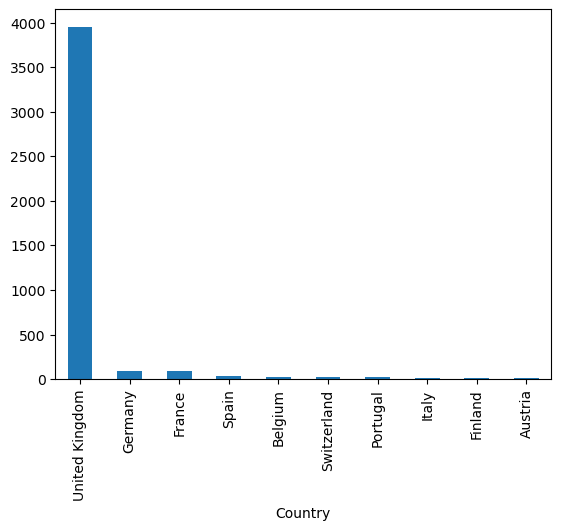

In [8]:
# TOP TEN COUNTRY'S CUSTOMER
filtered_data.Country.value_counts()[:10].plot(kind='bar')

In the given dataset, you can observe most of the customers are from the "United Kingdom". So, you can filter data for United Kingdom customer.

In [9]:
uk_data=data[data.Country=='United Kingdom']

In [10]:
uk_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 361878 entries, 0 to 541893
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    361878 non-null  object 
 1   StockCode    361878 non-null  object 
 2   Description  361878 non-null  object 
 3   Quantity     361878 non-null  int64  
 4   InvoiceDate  361878 non-null  object 
 5   UnitPrice    361878 non-null  float64
 6   CustomerID   361878 non-null  float64
 7   Country      361878 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 24.8+ MB


The describe() function in pandas is convenient in getting various summary statistics. This function returns the count, means, standard deviation, minimum and maximum values and the quantiles of the data.

In [11]:
uk_data.describe()

,Quantity,UnitPrice,CustomerID
count,361878.000000,361878.000000,361878.000000
mean,11.077029,3.256007,15547.871368
std,263.129266,70.654731,1594.402590
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,14194.000000
50%,4.000000,1.950000,15514.000000
75%,12.000000,3.750000,16931.000000
max,80995.000000,38970.000000,18287.000000


Here, you can observe some of the customers have ordered in a negative quantity, which is not possible. So, you need to filter Quantity greater than zero.

In [12]:
uk_data = uk_data[(uk_data['Quantity']>0)]

In [13]:
uk_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 354345 entries, 0 to 541893
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    354345 non-null  object 
 1   StockCode    354345 non-null  object 
 2   Description  354345 non-null  object 
 3   Quantity     354345 non-null  int64  
 4   InvoiceDate  354345 non-null  object 
 5   UnitPrice    354345 non-null  float64
 6   CustomerID   354345 non-null  float64
 7   Country      354345 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 24.3+ MB


In [14]:
uk_data.describe()

,Quantity,UnitPrice,CustomerID
count,354345.000000,354345.000000,354345.000000
mean,12.048913,2.963793,15552.436219
std,190.428127,17.862067,1594.546025
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,14194.000000
50%,4.000000,1.950000,15522.000000
75%,12.000000,3.750000,16931.000000
max,80995.000000,8142.750000,18287.000000


# Filter required Columns
Here, you can filter the necessary columns for RFM analysis. You only need her five columns CustomerID, InvoiceDate, InvoiceNo, Quantity, and UnitPrice. CustomerID will uniquely define your customers, InvoiceDate help you calculate recency of purchase, InvoiceNo helps you to count the number of time transaction performed (frequency). Quantity purchased in each transaction and UnitPrice of each unit purchased by the customer will help you to calculate the total purchased amount.

In [15]:
uk_data=uk_data[['CustomerID','InvoiceDate','InvoiceNo','Quantity','UnitPrice']]

In [16]:
uk_data.head()

,CustomerID,InvoiceDate,InvoiceNo,Quantity,UnitPrice
0,17850.0,12/1/2010 8:26,536365,6,2.55
1,17850.0,12/1/2010 8:26,536365,6,3.39
2,17850.0,12/1/2010 8:26,536365,8,2.75
3,17850.0,12/1/2010 8:26,536365,6,3.39
4,17850.0,12/1/2010 8:26,536365,6,3.39


In [17]:
uk_data['TotalPrice'] = uk_data['Quantity'] * uk_data['UnitPrice']

In [18]:
uk_data['InvoiceDate'].min(),uk_data['InvoiceDate'].max()

('1/10/2011 10:32', '9/9/2011 9:52')

In [19]:
PRESENT = dt.datetime(2011,12,10)
uk_data['InvoiceDate'] = pd.to_datetime(uk_data['InvoiceDate'])

In [20]:
uk_data.head()

,CustomerID,InvoiceDate,InvoiceNo,Quantity,UnitPrice,TotalPrice
0,17850.0,2010-12-01 08:26:00,536365,6,2.55,15.30
1,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34
2,17850.0,2010-12-01 08:26:00,536365,8,2.75,22.00
3,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34
4,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34


# RFM ANALYSIS
Here, you are going to perform following opertations:
<ul>
    <li>For Recency, calculate the number of days between present date and date of last purchase each customer.</li>
    <li>For Frequency, calculate the number of orders for each customer.</li>
    <li>For Monetary, calculate sum of purchase price for each customer.</li>
</ul>

In [21]:
rfm= uk_data.groupby('CustomerID').agg({
    'InvoiceDate': lambda date: (PRESENT - date.max()).days,
    'InvoiceNo': lambda num: len(num),
    'TotalPrice': lambda price: price.sum()})

In [22]:
rfm.columns

Index(['InvoiceDate', 'InvoiceNo', 'TotalPrice'], dtype='object')

In [23]:
rfm.columns = ['recency','monetary','frequency']

In [24]:
rfm['recency'] = rfm['recency'].astype(int)

In [25]:
rfm.head()

,recency,monetary,frequency
CustomerID,,,
12346.0,325,1,77183.60
12747.0,2,103,4196.01
12748.0,0,4596,33719.73
12749.0,3,199,4090.88
12820.0,3,59,942.34


# COMPUTING QUANTILE OF RFM VALUES
Customers with the lowest recency, highest frequency and monetary amounts considered as top customers.

qcut() is Quantile - based discretization function. qcut bins the data based on sample quantiles. For example, 1000 values for 4 quantiles would produce a categorical object indicating quantile membership for each customer.

In [26]:
rfm['r_quartile'] = pd.qcut(rfm['recency'],4,['1','2','3','4'])
rfm['f_quartile'] = pd.qcut(rfm['frequency'],4,['4','3','2','1'])
rfm['m_quartile'] = pd.qcut(rfm['monetary'],4,['4','3','2','1'])

In [27]:
rfm.head()

,recency,monetary,frequency,r_quartile,f_quartile,m_quartile
CustomerID,,,,,,
12346.0,325,1,77183.60,4,1,4
12747.0,2,103,4196.01,1,1,1
12748.0,0,4596,33719.73,1,1,1
12749.0,3,199,4090.88,1,1,1
12820.0,3,59,942.34,1,2,2


# RFM RESULT INTERPRETATION
Combine all three quartiles(r_quartile, f_quartile, m_quartile) in a single column, this rank will help you to segment the customers well group.

In [28]:
rfm['RFM_Score'] = rfm.r_quartile.astype(str)+ rfm.f_quartile.astype(str) + rfm.m_quartile.astype(str)
rfm.head()

,recency,monetary,frequency,r_quartile,f_quartile,m_quartile,RFM_Score
CustomerID,,,,,,,
12346.0,325,1,77183.60,4,1,4,414
12747.0,2,103,4196.01,1,1,1,111
12748.0,0,4596,33719.73,1,1,1,111
12749.0,3,199,4090.88,1,1,1,111
12820.0,3,59,942.34,1,2,2,122


In [30]:
rfm[rfm['RFM_Score']=='111'].sort_values('monetary',ascending=False).head()

,recency,monetary,frequency,r_quartile,f_quartile,m_quartile,RFM_Score
CustomerID,,,,,,,
17841.0,1,7847,40991.57,1,1,1,111
14096.0,4,5111,65164.79,1,1,1,111
12748.0,0,4596,33719.73,1,1,1,111
14606.0,1,2700,12156.65,1,1,1,111
15311.0,0,2379,60767.90,1,1,1,111
